## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
Comb_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
Comb_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Reg_Group = Comb_df.groupby("Drug Regimen")





Drug_Reg_df = pd.DataFrame([Reg_Group["Tumor Volume (mm3)"].mean().rename("Mean"),
                          Reg_Group["Tumor Volume (mm3)"].median().rename("Median"),
                          Reg_Group["Tumor Volume (mm3)"].var().rename("Variance"),
                          Reg_Group["Tumor Volume (mm3)"].std().rename("Stand Dev"),
                          Reg_Group["Tumor Volume (mm3)"].sem().rename("SEM")])
Drug_Reg_df = Drug_Reg_df.transpose()

Drug_Reg_df




Mean     Median   Variance  Stand Dev       SEM
Drug Regimen                                                      
Capomulin     40.675741  41.557809  24.947764   4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177   6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684   6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577   8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479   8.134708  0.596466
Placebo       54.033581  52.288934  61.168083   7.821003  0.581331
Propriva      52.322552  50.854632  42.351070   6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704   4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562   7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355   6.966589  0.516398

## Bar plots

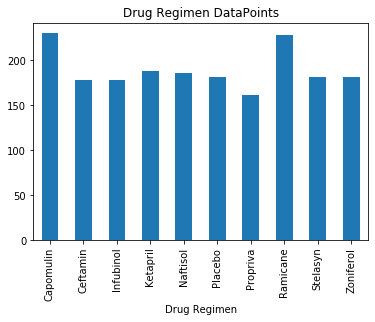

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

Reg_Group["Drug Regimen"].count().plot(kind="bar",title="Drug Regimen DataPoints")




Text(0.5, 1.0, 'Drug Regimen DataPoints')

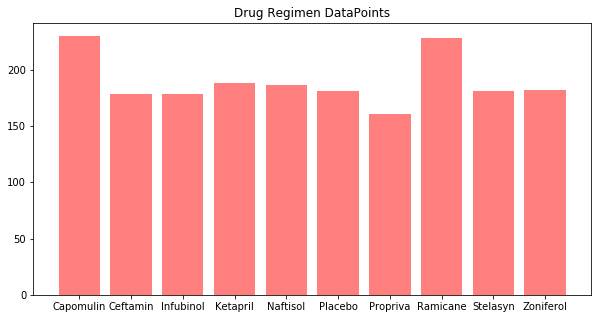

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drug_names = Drug_Reg_df.index
y_axis = Reg_Group["Drug Regimen"].count()
x_axis = np.arange(len(y_axis))
plt.figure(figsize=(10, 5))
plt.bar(x_axis,y_axis,color='r',alpha=0.5,align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_names)
plt.title("Drug Regimen DataPoints")



## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27abf9b0>],
      dtype=object)

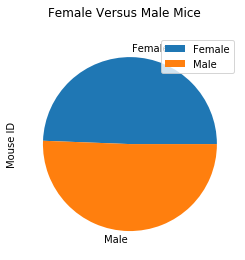

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_group = Comb_df.groupby("Sex")
Gender_df = pd.DataFrame(Gender_group["Mouse ID"].count())
#Gender_df=Gender_df.transpose()
Gender_df.plot(kind='pie',title="Female Versus Male Mice",subplots=True)


Text(0.5, 1.0, 'Female Versus Male Mice')

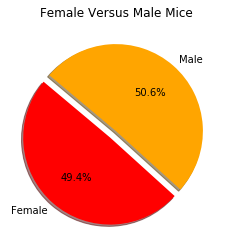

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = Gender_df["Mouse ID"]
labels = Gender_df.index
colors = ["red","orange"]
explode = (0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True,startangle=140)
plt.title("Female Versus Male Mice")

## Quartiles, outliers and boxplots

In [7]:
Comb_df = Comb_df.set_index("Drug Regimen")

In [8]:

Capomulin_Df = Comb_df.loc[["Capomulin"]]
Capomulin_group = Capomulin_Df.groupby("Mouse ID")["Timepoint"].max()
Capomulin_FinalVol_list = pd.merge(Capomulin_group,Capomulin_Df,on=["Mouse ID","Timepoint"],how="left")
Capomulin_FinalVol_list=Capomulin_FinalVol_list["Tumor Volume (mm3)"]

Ramicane_Df = Comb_df.loc[["Ramicane"]]
Ramicane_group = Ramicane_Df.groupby("Mouse ID")["Timepoint"].max()
Ramicane_FinalVol_list = pd.merge(Ramicane_group,Ramicane_Df,on=["Mouse ID","Timepoint"],how="left")
Ramicane_FinalVol_list=Ramicane_FinalVol_list["Tumor Volume (mm3)"]

Infubinol_Df = Comb_df.loc[["Infubinol"]]
Infubinol_group = Infubinol_Df.groupby("Mouse ID")["Timepoint"].max()
Infubinol_FinalVol_list = pd.merge(Infubinol_group,Infubinol_Df,on=["Mouse ID","Timepoint"],how="left")
Infubinol_FinalVol_list=Infubinol_FinalVol_list["Tumor Volume (mm3)"]

Ceftamin_Df = Comb_df.loc[["Ceftamin"]]
Ceftamin_group = Ceftamin_Df.groupby("Mouse ID")["Timepoint"].max()
Ceftamin_FinalVol_list = pd.merge(Ceftamin_group,Ceftamin_Df,on=["Mouse ID","Timepoint"],how="left")
Ceftamin_FinalVol_list=Ceftamin_FinalVol_list["Tumor Volume (mm3)"]

Data_to_plot = [Capomulin_FinalVol_list,Ramicane_FinalVol_list,Infubinol_FinalVol_list,Ceftamin_FinalVol_list]





In [9]:

quartiles = Capomulin_FinalVol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")







The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [10]:
quartiles = Ramicane_FinalVol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [11]:
quartiles = Infubinol_FinalVol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [12]:
quartiles = Ceftamin_FinalVol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


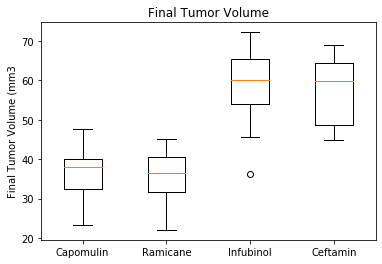

In [27]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3')
labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.boxplot(Data_to_plot,labels=labels)
plt.title("Final Tumor Volume")
plt.show()







## Line and scatter plots

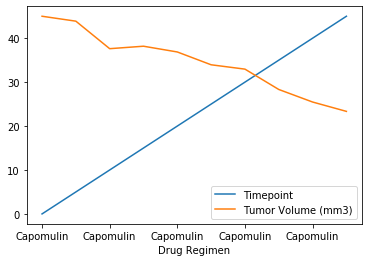

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = Capomulin_Df.loc[Capomulin_Df["Mouse ID"] == "s185"]
s185TT_df= s185_df[["Timepoint","Tumor Volume (mm3)"]]
s185TT_Line = s185TT_df.plot(kind='line')
s185TT_Line.set_xlabel="Time Point"


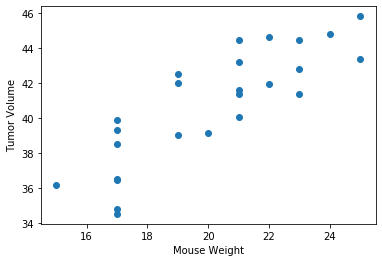

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Cap_Group = Capomulin_Df.groupby("Mouse ID")
Cap_Group_df =pd.DataFrame([Cap_Group["Weight (g)"].mean().rename("Mouse Weight"),
                           Cap_Group["Tumor Volume (mm3)"].mean().rename("Tumor Volume")])
Cap_Group_df=Cap_Group_df.transpose()
Cap_Group_df

plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.scatter(Cap_Group_df["Mouse Weight"],Cap_Group_df["Tumor Volume"])

plt.show()



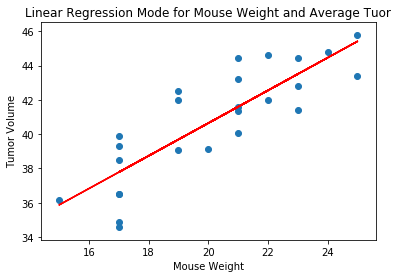

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
CorCoef = st.pearsonr(Cap_Group_df["Mouse Weight"],Cap_Group_df["Tumor Volume"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(Cap_Group_df["Mouse Weight"],Cap_Group_df["Tumor Volume"])

regress_values = Cap_Group_df["Mouse Weight"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(Cap_Group_df["Mouse Weight"],regress_values,"r-")
plt.scatter(Cap_Group_df["Mouse Weight"],Cap_Group_df["Tumor Volume"])

plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")


plt.title("Linear Regression Mode for Mouse Weight and Average Tuor")
plt.show()







In [17]:
# # Insigts about the Data
# 1. Between the four drug regimens Capomulin , Ramicane , Infubinol  and Ceftamin, Capomulin , 
# Ramicane may be performing better on the tumor since  final tumor volume median seem to be lower compared to Ramicane , Infubinol.

# 2. Mouse s185 seem to be responding to the Drug Regimen Capomulin , we can see as time point increases 
# the tumor volume is decreasing.

# 3. Based on the Linear regression model , we see a positive corelation between Mouse Weight and Tumor volume,
# as the weight of the mouse increasing volume of the tumor also increasing.





